In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns

In [4]:
data = pd.read_csv("credit_risk.csv")

In [5]:
data = data.drop(columns=['Id'])  # Removing the unique identifier
data = pd.get_dummies(data, columns=['Home', 'Intent', 'Default'])

In [6]:
imputer = SimpleImputer(strategy='mean')

In [7]:
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [8]:
X = data_imputed.drop(columns=['Status'])
y = data_imputed['Status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_classifier.predict(X_test)

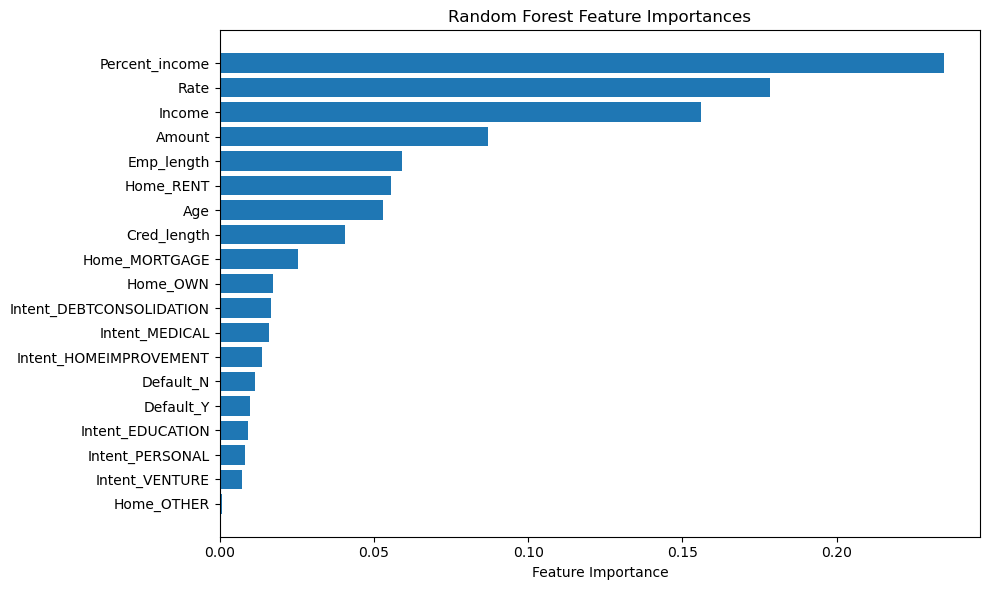

In [13]:
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

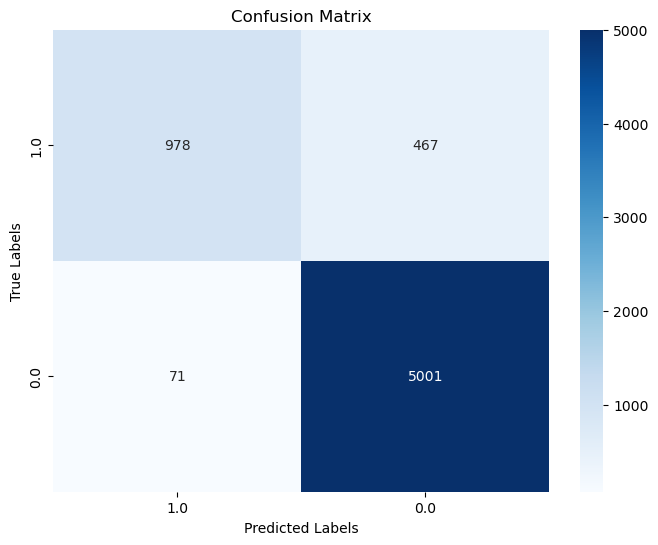

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.917446677919288
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      5072
         1.0       0.93      0.68      0.78      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517

